In [ ]:
import numpy as np
import pandas as pd
import pyodbc 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df1 = pd.read_csv('../input/covid19-coronavirus/2019_nCoV_data.csv')
Covid_Confirmed = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Confirmed.csv")
Covid_Deaths = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Deaths.csv")
Covid_Recovered = pd.read_csv('../input/covid19-coronavirus/time_series_19-covid-Recovered.csv')
df1.head()

In [ ]:
df1 = df1.astype({"Confirmed": int, "Deaths": int, "Recovered" : int})
df1 = df1.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered"])
df1.head()

In [ ]:
#Convert the date (remove time stamp)

df1['Date1'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date1'].dt.date
df1['Last Update1'] = pd.to_datetime(df1['Last Update'])
df1['Last Update'] = df1['Last Update1'].dt.date
df1 = df1.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered"])
df1.head()

In [ ]:
#Combine country and province to location and sum values pertaining to it

df1['Location'] = df1['Country'] + ', ' + df1['Province/State'].fillna('N/A')

daily = pd.DataFrame(columns=df1.columns)

for item in df1['Location'].unique():
    a = df1[df1['Location']==item].set_index('Date')
    a = a.rename_axis('Date').reset_index()
    daily = daily.append(a, sort=False, ignore_index=True)

df1_daily = daily.sort_values(['Date','Country','Province/State'])
df1_daily = df1_daily.reset_index()
df1_daily = df1_daily.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered", "Location"])
df1_daily.head()

In [ ]:
#For graph - Comparing the confirmed, deaths and recovered:

df1_date = df1_daily.filter(["Date",  "Confirmed", "Deaths", "Recovered"])
df1_date = df1_date.groupby(df1_date["Date"]).sum()
df1_date.head()

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(df1_date, marker='o')
plt.title('Total Number of Coronavirus Cases by Date')
plt.legend(df1_date.columns)
plt.xticks(rotation=75)
plt.show()

In [ ]:
#For graph - Confirmed cases by country:

fig = px.scatter(df1_daily, x='Date', y='Confirmed', hover_data=['Province/State', 'Deaths', 'Recovered'], color='Country')
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                              text='Confirmed cases by Country',
                              font=dict(family='Calibri', size=20, color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations)
fig.show()

In [ ]:
#For graph - Confirmed cases by Mainland China:

fig = px.line(df1_daily.loc[df1_daily["Country"] == "Mainland China"], x='Date', y='Confirmed', hover_data=['Province/State', 'Deaths', 'Recovered'], color='Country')
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=1.0, y=1.05, xanchor='left', yanchor='bottom',
                              text='Confirmed cases by Mainland China',
                              font=dict(family='Calibri', size=20, color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations)
fig.show()

In [ ]:
#For graph - Confirmed cases by Provinces in Mainland China:

fig = px.line(df1_daily.loc[df1_daily["Country"] == "Mainland China"], x='Date', y='Confirmed', hover_data=['Province/State', 'Deaths', 'Recovered'], color='Province/State')
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                              text='Confirmed cases by Provinces in China',
                              font=dict(family='Calibri', size=20, color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations)
fig.show()

OUTBREAK

In [ ]:
Confirmed_china = Covid_Confirmed.loc[Covid_Confirmed ["Country/Region"] == "Mainland China"]
Confirmed_china = Confirmed_china.rename(columns = {"Province/State" : "Province", "Country/Region":"Country"})
Confirmed_china = Confirmed_china.filter(["Province" , "Country", "Lat", "Long", "1/22/20","1/28/20", "2/4/20", "2/11/20", "2/17/20"])
Confirmed_china.head()

In [ ]:
#combi_day1 = pd.merge(Confirmed_china_hubei, Confirmed_china, on = "Country", how = 'outer')
combi_day1 = Confirmed_china.astype({"1/22/20" : int, "1/28/20" : int, "2/4/20" : int, "2/11/20" : int, "2/17/20" : int })
combi_day1 = combi_day1.rename(columns = {"1/22/20" : "firstday", "1/28/20" : "firstweek", "2/4/20" : "secweek", "2/11/20" : "thirdweek", "2/17/20" : "fourthweek"})
combi_day1.head()

In [ ]:
##### Using gmplot the following polygon has been obtained ######
# combi_day1 = combi_day1.loc[combi_day1["firstday"] >= 1]
# latitude_list = combi_day1["Lat"]
# longitude_list = combi_day1["Long"] 

# gmap5 = gmplot.GoogleMapPlotter(30.97564, 112.2707, 5) 
# gmap5.scatter( latitude_list, longitude_list, '# FF0000', size = 35, marker = True) 
# #polygon method Draw a polygon with the help of coordinates
# gmap5.polygon(latitude_list, longitude_list,  color = 'cornflowerblue') 
# gmap5.draw("C:\\Users\\vigne\\Desktop\\day1.html" ) 

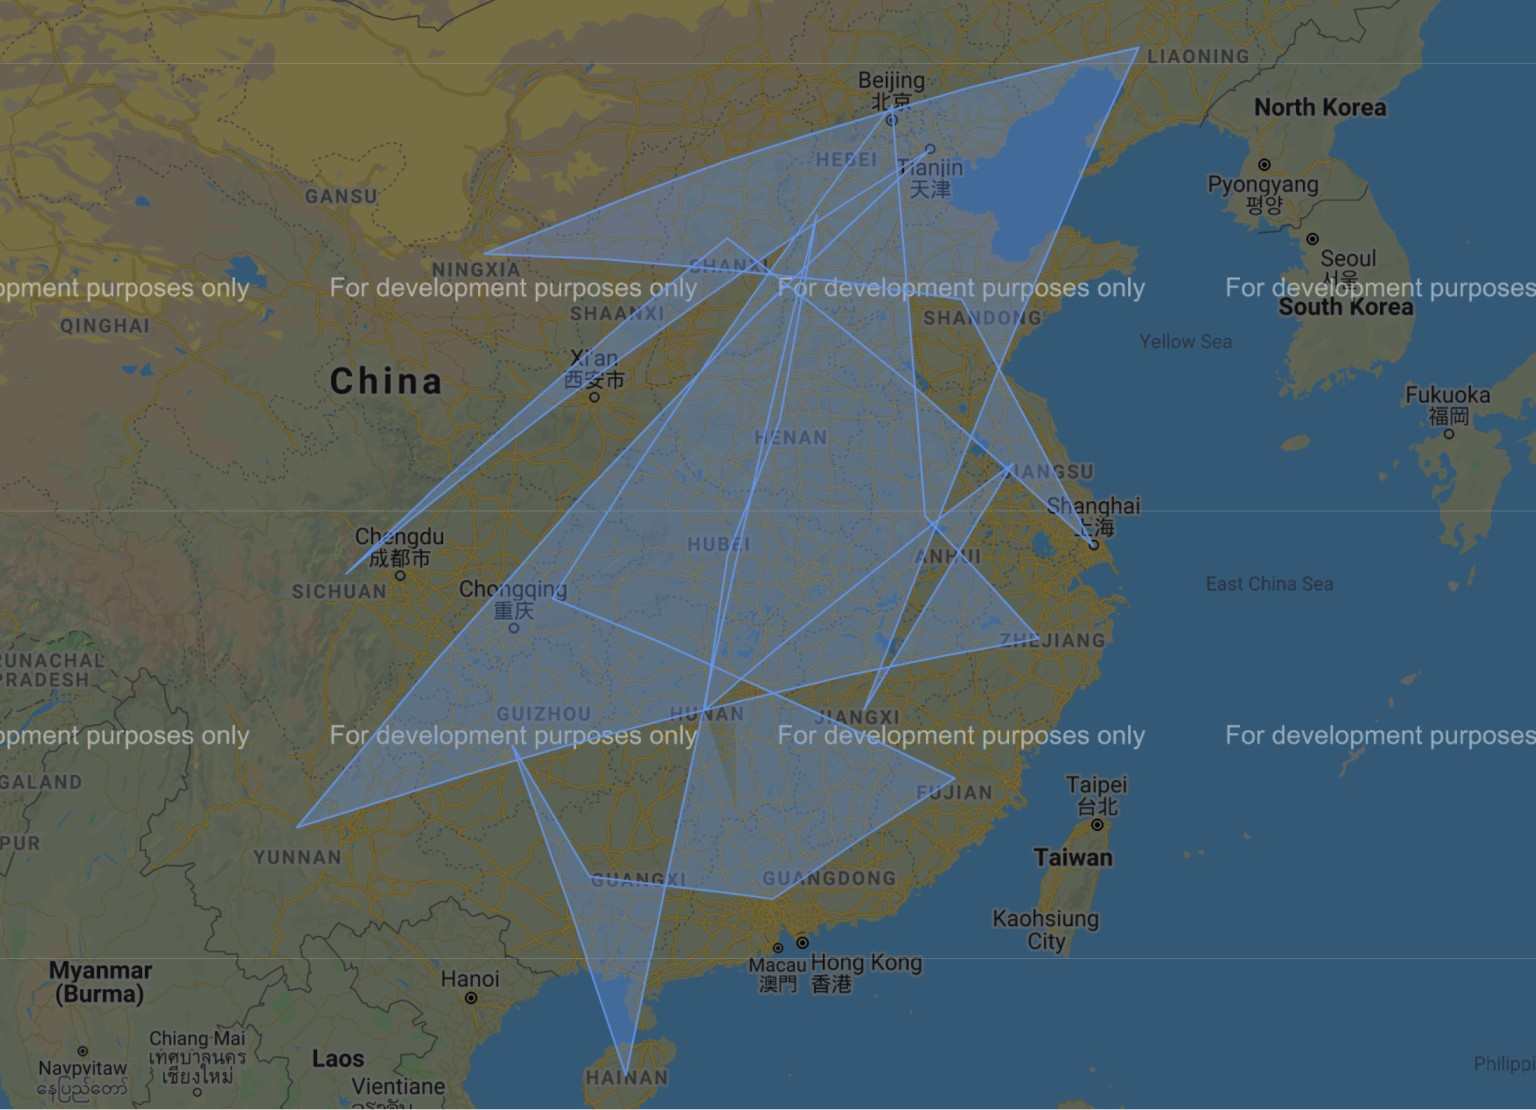

In [ ]:
df1_date = df1_date.reset_index()
df1_date

In [ ]:
#setting index as date
df1_date['Date'] = pd.to_datetime(df1_date.Date,format='%Y-%m-%d')
df1_date.index = df1_date['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df1_date['Confirmed'], label='Confirmed cases')

### LINEAR REGRESSION

In [ ]:
#setting index as date values
df1_date['Date'] = pd.to_datetime(df1_date.Date,format='%Y-%m-%d')
df1_date.index = df1_date['Date']

#sorting
data = df1_date.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df1_date)),columns=['Date', 'Confirmed'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Confirmed'][i] = data['Confirmed'][i]
new_data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data['Date'], new_data['Confirmed'], random_state = 0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [ ]:
#create features
from fastai.tabular import add_datepart
add_datepart(X_train, 'Date')
X_train.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
X_train = X_train.filter([ "Year", "Month", "Day"])
X_train

add_datepart(X_test, 'Date')
X_test.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
X_test = X_test.filter([ "Year", "Month", "Day"])
X_test

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

In [ ]:
preds

In [ ]:
new_data

In [ ]:


from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(new_data.Confirmed.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df =new_data

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(new_data.Confirmed); axes[0, 0].set_title('Original Series')
plot_acf(new_data.Confirmed, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(new_data.Confirmed.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(new_data.Confirmed.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(new_data.Confirmed.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(new_data.Confirmed.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
from pmdarima.arima.utils import ndiffs
df = new_data
y = df.Confirmed

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(new_data.Confirmed.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(new_data.Confirmed.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = new_data

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(new_data.Confirmed.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(new_data.Confirmed.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(new_data.Confirmed.astype(float), order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(new_data.Confirmed.astype(float), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = new_data.Confirmed[:20]
test = new_data.Confirmed[21:]

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train.astype(float), order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# # Build Model
# model = ARIMA(train.astype(float), order=(3, 2, 1))  
# fitted = model.fit(disp=-1)  
# print(fitted.summary())

# # Forecast
# fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()